In [123]:
import pandas as pd
import numpy as mpde
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.impute import KNNImputer
from sklearn.preprocessing import RobustScaler,StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from sklearn.svm import SVR
from statistics import mean,median,mode
from sklearn.metrics import mean_squared_error
pd.set_option('display.max_columns', None)  
pd.set_option('display.max_rows', None) 

In [2]:
df = pd.read_csv(r'C:\Users\Vishwarath Patil\Downloads\microsoft-data-science-capstone\training_values.csv')

In [3]:
label = pd.read_csv(r'C:\Users\Vishwarath Patil\Downloads\microsoft-data-science-capstone\training_labels.csv')

In [4]:
label.drop('row_id',axis=1,inplace=True)

In [5]:
df = pd.concat([df,label],axis=1)
df.drop('row_id',axis=1,inplace=True)

In [6]:
df.isnull().sum()

area__rucc                                             0
area__urban_influence                                  0
econ__economic_typology                                0
econ__pct_civilian_labor                               0
econ__pct_unemployment                                 0
econ__pct_uninsured_adults                             2
econ__pct_uninsured_children                           2
demo__pct_female                                       2
demo__pct_below_18_years_of_age                        2
demo__pct_aged_65_years_and_older                      2
demo__pct_hispanic                                     2
demo__pct_non_hispanic_african_american                2
demo__pct_non_hispanic_white                           2
demo__pct_american_indian_or_alaskan_native            2
demo__pct_asian                                        2
demo__pct_adults_less_than_a_high_school_diploma       0
demo__pct_adults_with_high_school_diploma              0
demo__pct_adults_with_some_coll

In [7]:
df.corr()

,econ__pct_civilian_labor,econ__pct_unemployment,econ__pct_uninsured_adults,econ__pct_uninsured_children,demo__pct_female,demo__pct_below_18_years_of_age,demo__pct_aged_65_years_and_older,demo__pct_hispanic,demo__pct_non_hispanic_african_american,demo__pct_non_hispanic_white,demo__pct_american_indian_or_alaskan_native,demo__pct_asian,demo__pct_adults_less_than_a_high_school_diploma,demo__pct_adults_with_high_school_diploma,demo__pct_adults_with_some_college,demo__pct_adults_bachelors_or_higher,demo__birth_rate_per_1k,demo__death_rate_per_1k,health__pct_adult_obesity,health__pct_adult_smoking,health__pct_diabetes,health__pct_low_birthweight,health__pct_excessive_drinking,health__pct_physical_inacticity,health__air_pollution_particulate_matter,health__homicides_per_100k,health__motor_vehicle_crash_deaths_per_100k,health__pop_per_dentist,health__pop_per_primary_care_physician,heart_disease_mortality_per_100k
econ__pct_civilian_labor,1.000000,-0.619050,-0.409084,-0.027494,0.110016,-0.014214,0.005105,0.006413,-0.344771,0.272709,-0.135591,0.177972,-0.520928,-0.221864,0.239878,0.432600,-0.004480,-0.280318,-0.370449,-0.432774,-0.501138,-0.438661,0.387857,-0.346026,-0.117639,-0.391567,-0.346759,-0.285938,-0.218591,-0.476644
econ__pct_unemployment,-0.619050,1.000000,0.272174,-0.104250,0.071061,0.004807,-0.049590,-0.023614,0.382720,-0.318868,0.190529,-0.088859,0.417660,0.188042,-0.236731,-0.328854,-0.012124,0.190105,0.292533,0.357539,0.421372,0.378766,-0.214149,0.230216,0.150009,0.418517,0.229797,0.178324,0.136225,0.371620
econ__pct_uninsured_adults,-0.409084,0.272174,1.000000,0.717686,-0.075923,0.280156,-0.075758,0.477905,0.206069,-0.553043,0.244569,-0.107385,0.663280,0.029720,-0.235539,-0.391967,0.283840,0.060668,0.180362,0.264521,0.294417,0.327780,-0.340959,0.285383,-0.219350,0.410288,0.455132,0.237915,0.165261,0.334217
econ__pct_uninsured_children,-0.027494,-0.104250,0.717686,1.000000,-0.210481,0.183530,0.083595,0.441586,-0.102605,-0.296403,0.203009,-0.088984,0.281981,-0.079490,0.040217,-0.176100,0.161277,-0.049375,-0.128264,0.005351,-0.055636,0.023666,-0.045826,0.009911,-0.345746,0.109011,0.406176,0.152708,0.103520,-0.034482
demo__pct_female,0.110016,0.071061,-0.075923,-0.210481,1.000000,0.198426,0.106818,-0.161775,0.098055,0.066155,-0.067177,0.011124,-0.132861,-0.105611,0.011703,0.178108,0.105928,0.183712,0.042139,-0.061542,0.189265,0.074387,-0.215347,0.068177,0.109214,0.150494,-0.078898,-0.131156,-0.131682,0.087040
demo__pct_below_18_years_of_age,-0.014214,0.004807,0.280156,0.183530,0.198426,1.000000,-0.566433,0.320619,0.021930,-0.372009,0.338919,0.017484,0.220713,-0.115838,0.043561,-0.102530,0.729499,-0.300698,0.170959,-0.001050,-0.039540,-0.034874,-0.125961,0.061171,-0.113426,0.117317,0.136475,0.010419,0.063192,0.121956
demo__pct_aged_65_years_and_older,0.005105,-0.049590,-0.075758,0.083595,0.106818,-0.566433,1.000000,-0.245170,-0.225004,0.443333,-0.174043,-0.318555,-0.141437,0.303670,0.135045,-0.211250,-0.518523,0.641700,-0.035280,0.038207,0.213014,-0.076327,0.069281,0.164289,-0.074186,-0.075816,0.214857,0.049268,-0.004279,-0.056203
demo__pct_hispanic,0.006413,-0.023614,0.477905,0.441586,-0.161775,0.320619,-0.245170,1.000000,-0.105977,-0.606503,-0.014196,0.170148,0.437311,-0.317864,-0.100377,-0.023831,0.305104,-0.297895,-0.246222,-0.203549,-0.252581,-0.005086,-0.031318,-0.215272,-0.392282,-0.042616,-0.053457,0.033520,0.000065,-0.112437
demo__pct_non_hispanic_african_american,-0.344771,0.382720,0.206069,-0.102605,0.098055,0.021930,-0.225004,-0.105977,1.000000,-0.593988,-0.102537,0.021415,0.353568,-0.046056,-0.254590,-0.084342,0.066101,0.028557,0.407675,0.025176,0.486529,0.681410,-0.284243,0.257043,0.166423,0.694183,0.106834,0.148207,0.108058,0.375385
demo__pct_non_hispanic_white,0.272709,-0.318868,-0.553043,-0.296403,0.066155,-0.372009,0.443333,-0.606503,-0.593988,1.000000,-0.330840,-0.255790,-0.528671,0.310179,0.210041,0.035379,-0.411508,0.254981,-0.132844,0.039222,-0.157388,-0.418430,0.164171,-0.001750,0.227679,-0.578210,-0.11

In [8]:
df.head()

,area__rucc,area__urban_influence,econ__economic_typology,econ__pct_civilian_labor,econ__pct_unemployment,econ__pct_uninsured_adults,econ__pct_uninsured_children,demo__pct_female,demo__pct_below_18_years_of_age,demo__pct_aged_65_years_and_older,demo__pct_hispanic,demo__pct_non_hispanic_african_american,demo__pct_non_hispanic_white,demo__pct_american_indian_or_alaskan_native,demo__pct_asian,demo__pct_adults_less_than_a_high_school_diploma,demo__pct_adults_with_high_school_diploma,demo__pct_adults_with_some_college,demo__pct_adults_bachelors_or_higher,demo__birth_rate_per_1k,demo__death_rate_per_1k,health__pct_adult_obesity,health__pct_adult_smoking,health__pct_diabetes,health__pct_low_birthweight,health__pct_excessive_drinking,health__pct_physical_inacticity,health__air_pollution_particulate_matter,health__homicides_per_100k,health__motor_vehicle_crash_deaths_per_100k,health__pop_per_dentist,health__pop_per_primary_care_physician,yr,heart_disease_mortality_per_100k
0,Metro - Counties in metro areas of fewer than ...,Small-in a metro area with fewer than 1 millio...,Manufacturing-dependent,0.408,0.057,0.254,0.066,0.516,0.235,0.176,0.109,0.039,0.829,0.004,0.011,0.194223,0.424303,0.227092,0.154382,12,12,0.297,0.230,0.131,0.089,NaN,0.332,13.0,2.80,15.09,1650.0,1489.0,a,312
1,Metro - Counties in metro areas of fewer than ...,Small-in a metro area with fewer than 1 millio...,Mining-dependent,0.556,0.039,0.260,0.143,0.503,0.272,0.101,0.410,0.070,0.493,0.008,0.015,0.164134,0.234043,0.342452,0.259372,19,7,0.288,0.190,0.090,0.082,0.181,0.265,10.0,2.30,19.79,2010.0,2480.0,a,257
2,Metro - Counties in metro areas of 1 million p...,Large-in a metro area with at least 1 million ...,Nonspecialized,0.541,0.057,0.070,0.023,0.522,0.179,0.115,0.202,0.198,0.479,0.013,0.085,0.158573,0.237859,0.186323,0.417245,12,6,0.212,0.156,0.084,0.098,0.195,0.209,10.0,9.31,3.14,629.0,690.0,b,195
3,"Nonmetro - Urban population of 2,500 to 19,999...",Noncore adjacent to a small metro with town of...,Nonspecialized,0.500,0.061,0.203,0.059,0.525,0.200,0.164,0.013,0.049,0.897,0.007,0.001,0.181637,0.407186,0.248503,0.162675,11,12,0.285,NaN,0.104,0.058,NaN,0.238,13.0,NaN,NaN,1810.0,6630.0,b,218
4,"Nonmetro - Urban population of 2,500 to 19,999...",Noncore not adjacent to a metro/micro area and...,Nonspecialized,0.471,0.050,0.225,0.103,0.511,0.237,0.171,0.025,0.008,0.953,0.003,0.000,0.122367,0.413240,0.306921,0.157472,14,12,0.284,0.234,0.137,0.070,0.194,0.290,9.0,NaN,29.39,3489.0,2590.0,a,355


In [9]:
#sns.barplot(df['area__rucc'],df['heart_disease_mortality_per_100k'])

Handling NaN values

In [10]:
df['econ__pct_uninsured_adults'].fillna(df['econ__pct_uninsured_adults'].median(),inplace=True)
df['econ__pct_uninsured_children'].fillna(df['econ__pct_uninsured_children'].median(),inplace=True)
df['demo__pct_female'].fillna(df['demo__pct_female'].mean(),inplace=True)
df['demo__pct_below_18_years_of_age'].fillna(df['demo__pct_below_18_years_of_age'].mean(),inplace=True)
df['demo__pct_aged_65_years_and_older'].fillna(df['demo__pct_aged_65_years_and_older'].mean(),inplace=True)
df['demo__pct_hispanic'].fillna(0.019,inplace=True)
df['demo__pct_non_hispanic_african_american'].fillna(0.0,inplace=True)
df['demo__pct_non_hispanic_white'].fillna(df['demo__pct_non_hispanic_white'].mean(),inplace=True)
df['demo__pct_american_indian_or_alaskan_native'].fillna(0.0,inplace=True)
df['demo__pct_asian'].fillna(0.0,inplace=True)
df['health__pct_adult_obesity'].fillna(df['health__pct_adult_obesity'].mean(),inplace=True)
df['health__pct_physical_inacticity'].fillna(df['health__pct_physical_inacticity'].mean(),inplace=True)
df['health__pct_diabetes'].fillna(df['health__pct_diabetes'].median(),inplace=True)
df['health__pct_low_birthweight'].fillna(df['health__pct_low_birthweight'].mean(),inplace=True)
df['health__pct_excessive_drinking'].fillna(df['health__pct_excessive_drinking'].mean(),inplace=True)
df['health__air_pollution_particulate_matter'].fillna(df['health__air_pollution_particulate_matter'].median(),inplace=True)
df['health__motor_vehicle_crash_deaths_per_100k'].fillna(df['health__motor_vehicle_crash_deaths_per_100k'].mean(),inplace=True)
df['health__pop_per_dentist'].fillna(df['health__pop_per_dentist'].mean(),inplace=True)
df['health__pop_per_primary_care_physician'].fillna(df['health__pop_per_primary_care_physician'].median(),inplace=True)

C:\Users\Vishwarath Patil\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


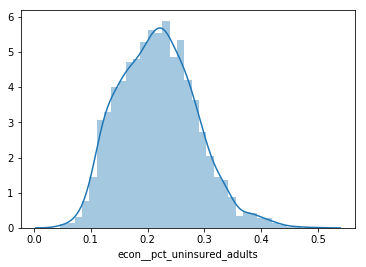

In [11]:
df_ = df[df['econ__pct_uninsured_adults'].isnull()==False]
sns.distplot(df_['econ__pct_uninsured_adults'])

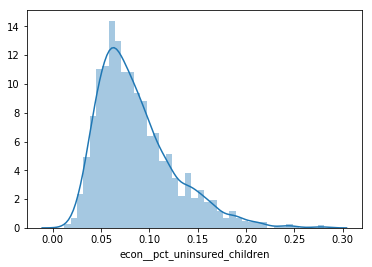

In [12]:
df_ = df[df['econ__pct_uninsured_children'].isnull()==False]
sns.distplot(df_['econ__pct_uninsured_children'])

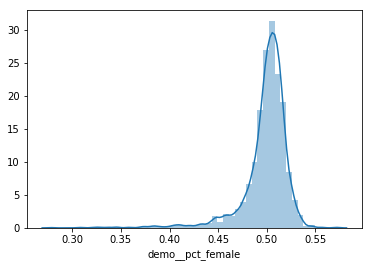

In [13]:
df_ = df[df['demo__pct_female'].isnull()==False]
sns.distplot(df_['demo__pct_female'])

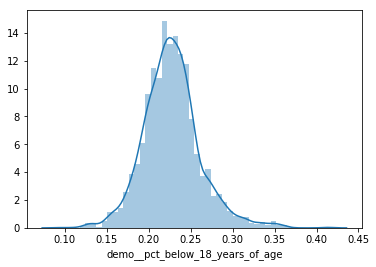

In [14]:
df_ = df[df['demo__pct_below_18_years_of_age'].isnull()==False]
sns.distplot(df_['demo__pct_below_18_years_of_age'])

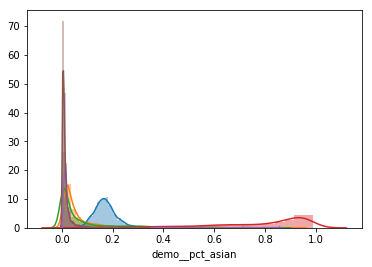

In [15]:
null_ls = ['demo__pct_aged_65_years_and_older','demo__pct_hispanic','demo__pct_non_hispanic_african_american','demo__pct_non_hispanic_white','demo__pct_american_indian_or_alaskan_native','demo__pct_asian']
for i in null_ls:
    df_ = df[df[i].isnull()==False]
    sns.distplot(df_[i])
 

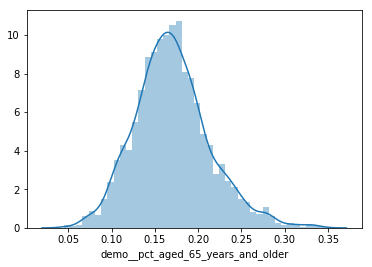

In [16]:
df_ = df[df['demo__pct_aged_65_years_and_older'].isnull()==False]
sns.distplot(df_['demo__pct_aged_65_years_and_older'])

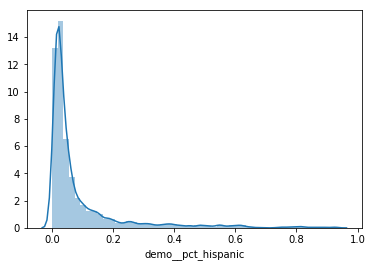

In [17]:
df_ = df[df['demo__pct_hispanic'].isnull()==False]
sns.distplot(df_['demo__pct_hispanic'])

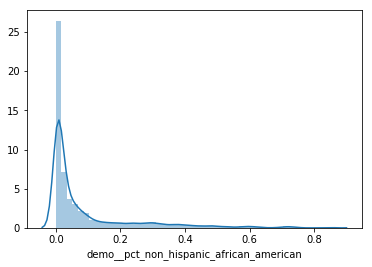

In [18]:
df_ = df[df['demo__pct_non_hispanic_african_american'].isnull()==False]
sns.distplot(df_['demo__pct_non_hispanic_african_american'])

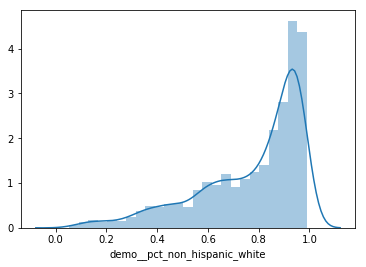

In [19]:
df_ = df[df['demo__pct_non_hispanic_white'].isnull()==False]
sns.distplot(df_['demo__pct_non_hispanic_white'])

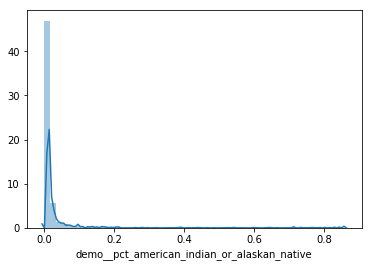

In [20]:
df_ = df[df['demo__pct_american_indian_or_alaskan_native'].isnull()==False]
sns.distplot(df_['demo__pct_american_indian_or_alaskan_native'])

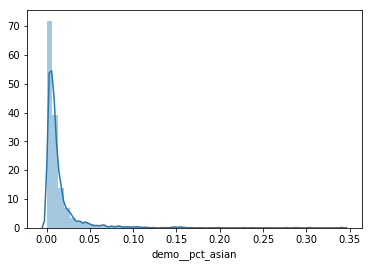

In [21]:
df_ = df[df['demo__pct_asian'].isnull()==False]
sns.distplot(df_['demo__pct_asian'])

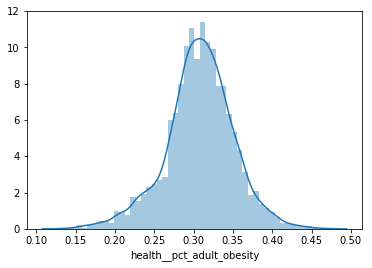

In [22]:
df_ = df[df['health__pct_adult_obesity'].isnull()==False]
sns.distplot(df_['health__pct_adult_obesity'])

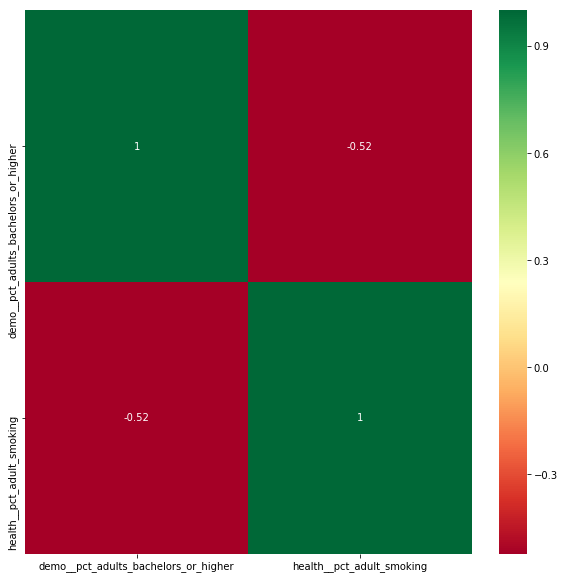

In [23]:
corrmat = df.corr()
top_corr_features = corrmat.index[abs(corrmat["health__pct_adult_smoking"]) > 0.5]
plt.figure(figsize=(10, 10))
g = sns.heatmap(df[top_corr_features].corr(), annot=True, cmap="RdYlGn")

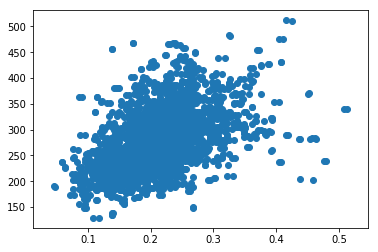

In [24]:
df_ = df[df['health__pct_adult_smoking'].isnull()==False]
plt.scatter(df_['health__pct_adult_smoking'],df_['heart_disease_mortality_per_100k'])

In [25]:
df_.head()
# Manual analysis how values are varies with other feature value

,area__rucc,area__urban_influence,econ__economic_typology,econ__pct_civilian_labor,econ__pct_unemployment,econ__pct_uninsured_adults,econ__pct_uninsured_children,demo__pct_female,demo__pct_below_18_years_of_age,demo__pct_aged_65_years_and_older,demo__pct_hispanic,demo__pct_non_hispanic_african_american,demo__pct_non_hispanic_white,demo__pct_american_indian_or_alaskan_native,demo__pct_asian,demo__pct_adults_less_than_a_high_school_diploma,demo__pct_adults_with_high_school_diploma,demo__pct_adults_with_some_college,demo__pct_adults_bachelors_or_higher,demo__birth_rate_per_1k,demo__death_rate_per_1k,health__pct_adult_obesity,health__pct_adult_smoking,health__pct_diabetes,health__pct_low_birthweight,health__pct_excessive_drinking,health__pct_physical_inacticity,health__air_pollution_particulate_matter,health__homicides_per_100k,health__motor_vehicle_crash_deaths_per_100k,health__pop_per_dentist,health__pop_per_primary_care_physician,yr,heart_disease_mortality_per_100k
0,Metro - Counties in metro areas of fewer than ...,Small-in a metro area with fewer than 1 millio...,Manufacturing-dependent,0.408,0.057,0.254,0.066,0.516,0.235,0.176,0.109,0.039,0.829,0.004,0.011,0.194223,0.424303,0.227092,0.154382,12,12,0.297,0.230,0.131,0.089,0.164841,0.332,13.0,2.80,15.09,1650.0,1489.0,a,312
1,Metro - Counties in metro areas of fewer than ...,Small-in a metro area with fewer than 1 millio...,Mining-dependent,0.556,0.039,0.260,0.143,0.503,0.272,0.101,0.410,0.070,0.493,0.008,0.015,0.164134,0.234043,0.342452,0.259372,19,7,0.288,0.190,0.090,0.082,0.181000,0.265,10.0,2.30,19.79,2010.0,2480.0,a,257
2,Metro - Counties in metro areas of 1 million p...,Large-in a metro area with at least 1 million ...,Nonspecialized,0.541,0.057,0.070,0.023,0.522,0.179,0.115,0.202,0.198,0.479,0.013,0.085,0.158573,0.237859,0.186323,0.417245,12,6,0.212,0.156,0.084,0.098,0.195000,0.209,10.0,9.31,3.14,629.0,690.0,b,195
4,"Nonmetro - Urban population of 2,500 to 19,999...",Noncore not adjacent to a metro/micro area and...,Nonspecialized,0.471,0.050,0.225,0.103,0.511,0.237,0.171,0.025,0.008,0.953,0.003,0.000,0.122367,0.413240,0.306921,0.157472,14,12,0.284,0.234,0.137,0.070,0.194000,0.290,9.0,NaN,29.39,3489.0,2590.0,a,355
5,"Nonmetro - Urban population of 20,000 or more,...",Micropolitan adjacent to a small metro area,Federal/State government-dependent,0.501,0.048,0.212,0.055,0.516,0.207,0.121,0.022,0.046,0.903,0.002,0.006,0.137755,0.294898,0.280612,0.286735,11,8,0.283,0.220,0.112,0.089,0.067000,0.272,13.0,3.80,13.74,2439.0,1540.0,a,288


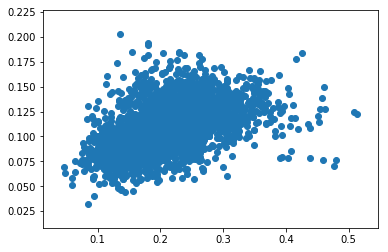

In [26]:
plt.scatter(df_['health__pct_adult_smoking'],df_['health__pct_diabetes'])

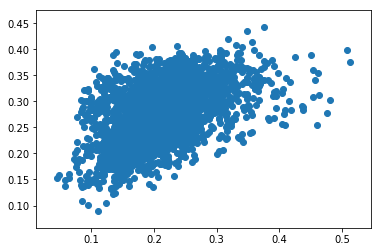

In [27]:
plt.scatter(df_['health__pct_adult_smoking'],df_['health__pct_physical_inacticity'])

0.10954352596927575

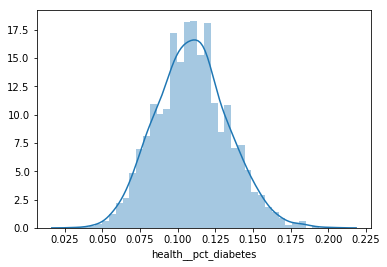

In [28]:
sns.distplot(df_['health__pct_diabetes'])
df_['health__pct_diabetes'].mean()

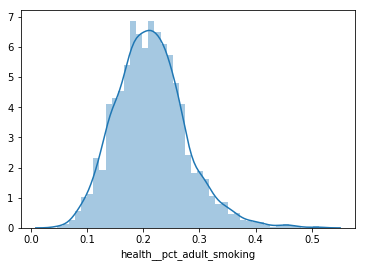

In [29]:
sns.distplot(df_['health__pct_adult_smoking'])

Imputation KNN Filling NaN

In [30]:
def imputer(x,k):
    i = KNNImputer(n_neighbors=k)
    return pd.DataFrame(i.fit_transform(x))

In [31]:
df__ = df[['health__pct_adult_smoking','health__pct_physical_inacticity']]

In [32]:
i = imputer(df__,56)
df['health__pct_adult_smoking']= i.iloc[:,0]

C:\Users\Vishwarath Patil\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


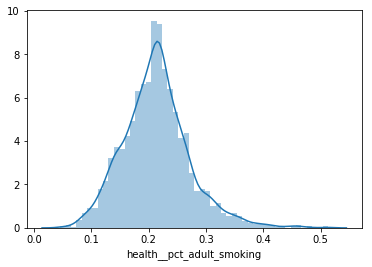

In [33]:
sns.distplot(df['health__pct_adult_smoking'])

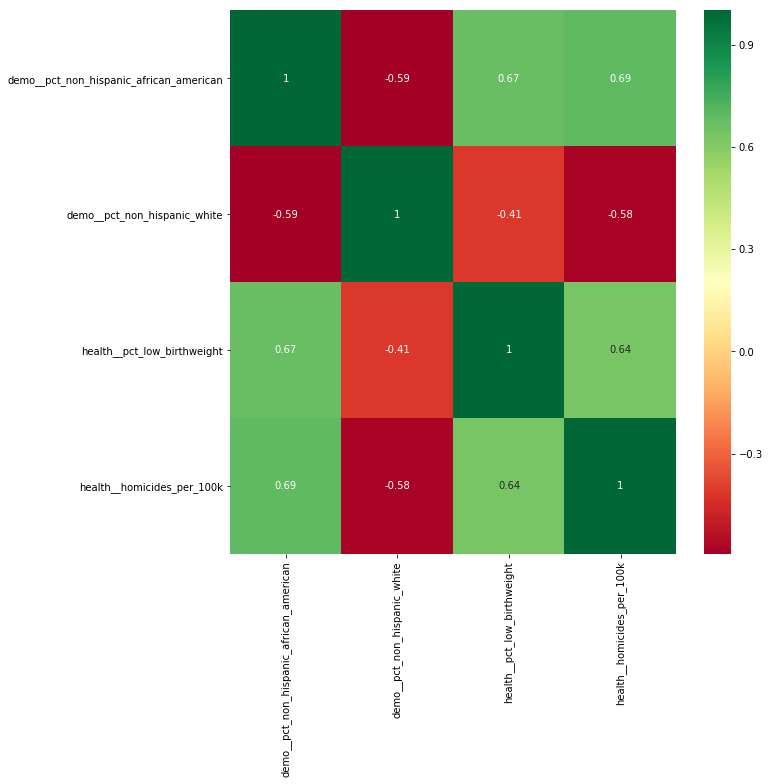

In [34]:
corrmat = df.corr()
top_corr_features = corrmat.index[abs(corrmat["health__homicides_per_100k"]) > 0.5]
plt.figure(figsize=(10, 10))
g = sns.heatmap(df[top_corr_features].corr(), annot=True, cmap="RdYlGn")

In [35]:
df_ = df[df['health__pct_low_birthweight'].isnull()==False]

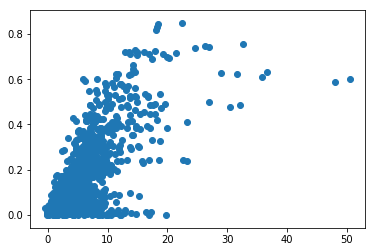

In [36]:
plt.scatter(df_['health__homicides_per_100k'],df_['demo__pct_non_hispanic_african_american'])

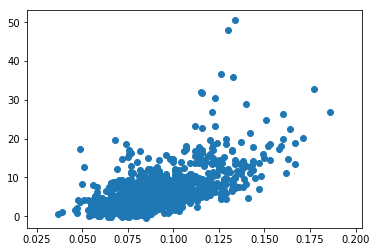

In [37]:
plt.scatter(df['health__pct_low_birthweight'],df['health__homicides_per_100k'])

0.08199999999999999

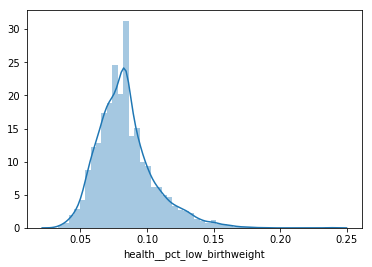

In [38]:
sns.distplot(df_['health__pct_low_birthweight'])
df_['health__pct_low_birthweight'].median()

In [39]:
df__ = df_[['health__pct_low_birthweight','health__homicides_per_100k','demo__pct_non_hispanic_african_american']]
df__.head(n=10)

,health__pct_low_birthweight,health__homicides_per_100k,demo__pct_non_hispanic_african_american
0,0.089,2.80,0.039
1,0.082,2.30,0.070
2,0.098,9.31,0.198
3,0.058,NaN,0.049
4,0.070,NaN,0.008
5,0.089,3.80,0.046
6,0.070,NaN,0.002
7,0.092,5.60,0.224
8,0.139,13.60,0.719
9,0.073,NaN,0.000


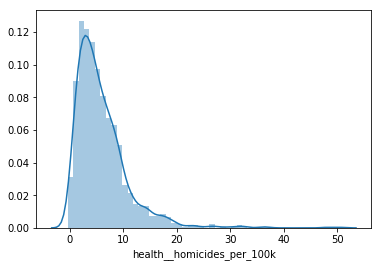

In [40]:
df_ = df[['health__homicides_per_100k','demo__pct_non_hispanic_african_american']]
not_null = df_[df_['health__homicides_per_100k'].isnull()==False]
sns.distplot(not_null['health__homicides_per_100k'])

C:\Users\Vishwarath Patil\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


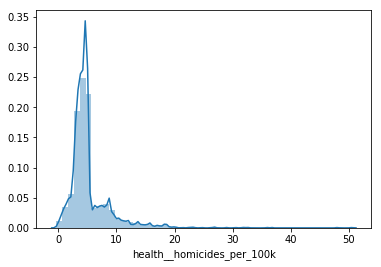

In [41]:
i = imputer(df_,48)
df['health__homicides_per_100k'] = i.iloc[:,0]
sns.distplot(df['health__homicides_per_100k'])

0.16484144144144144

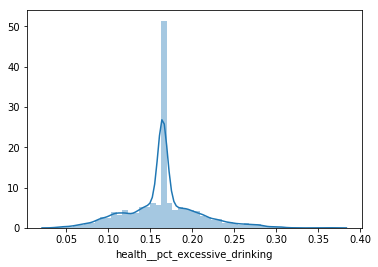

In [42]:
df_ = df[df['health__pct_excessive_drinking'].isnull()==False]
sns.distplot(df_['health__pct_excessive_drinking'])
df_['health__pct_excessive_drinking'].median()

12.0

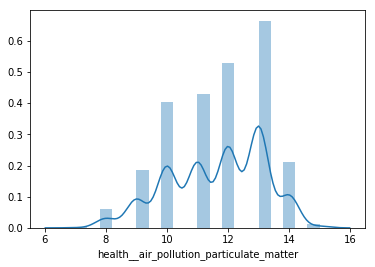

In [43]:
df_ = df[df['health__air_pollution_particulate_matter'].isnull()==False]
sns.distplot(df_['health__air_pollution_particulate_matter'])
df_['health__air_pollution_particulate_matter'].median()

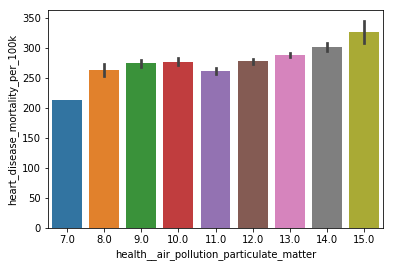

In [44]:
sns.barplot(df_['health__air_pollution_particulate_matter'],df_['heart_disease_mortality_per_100k'])

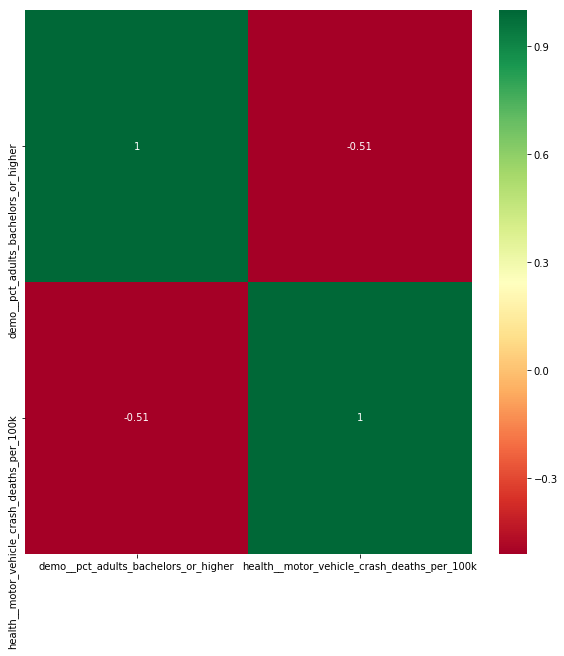

In [45]:
corrmat = df.corr()
top_corr_features = corrmat.index[abs(corrmat["health__motor_vehicle_crash_deaths_per_100k"]) > 0.5]
plt.figure(figsize=(10, 10))
g = sns.heatmap(df[top_corr_features].corr(), annot=True, cmap="RdYlGn")

21.13261776339444

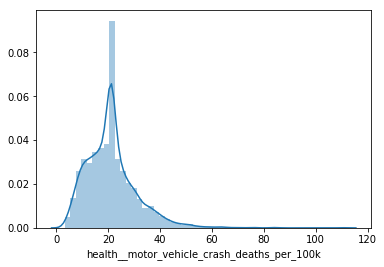

In [46]:
df_ = df[df['health__motor_vehicle_crash_deaths_per_100k'].isnull()==False]
sns.distplot(df_['health__motor_vehicle_crash_deaths_per_100k'])
df_['health__motor_vehicle_crash_deaths_per_100k'].median()

2859.5

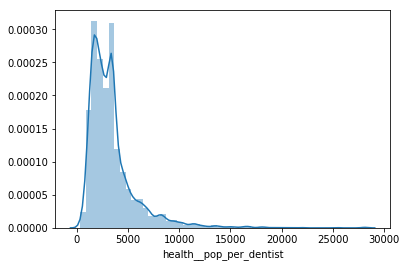

In [47]:
df_ = df[df['health__pop_per_dentist'].isnull()==False]
sns.distplot(df_['health__pop_per_dentist'])
df_['health__pop_per_dentist'].median()

1999.0

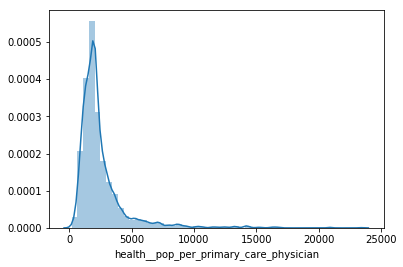

In [48]:
df_ = df[df['health__pop_per_primary_care_physician'].isnull()==False]
sns.distplot(df_['health__pop_per_primary_care_physician'])
df_['health__pop_per_primary_care_physician'].median()

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3198 entries, 0 to 3197
Data columns (total 34 columns):
area__rucc                                          3198 non-null object
area__urban_influence                               3198 non-null object
econ__economic_typology                             3198 non-null object
econ__pct_civilian_labor                            3198 non-null float64
econ__pct_unemployment                              3198 non-null float64
econ__pct_uninsured_adults                          3198 non-null float64
econ__pct_uninsured_children                        3198 non-null float64
demo__pct_female                                    3198 non-null float64
demo__pct_below_18_years_of_age                     3198 non-null float64
demo__pct_aged_65_years_and_older                   3198 non-null float64
demo__pct_hispanic                                  3198 non-null float64
demo__pct_non_hispanic_african_american             3198 non-null float64
demo__pc

Dummy Variables 

In [50]:
cat_columns = ['area__rucc','area__urban_influence','econ__economic_typology','yr']
for i in cat_columns:
    dummy = pd.get_dummies(df[i])
    df = pd.concat([df,dummy],axis=1)
    df.drop(i,axis=1,inplace=True)

In [51]:
df.corr()

,econ__pct_civilian_labor,econ__pct_unemployment,econ__pct_uninsured_adults,econ__pct_uninsured_children,demo__pct_female,demo__pct_below_18_years_of_age,demo__pct_aged_65_years_and_older,demo__pct_hispanic,demo__pct_non_hispanic_african_american,demo__pct_non_hispanic_white,demo__pct_american_indian_or_alaskan_native,demo__pct_asian,demo__pct_adults_less_than_a_high_school_diploma,demo__pct_adults_with_high_school_diploma,demo__pct_adults_with_some_college,demo__pct_adults_bachelors_or_higher,demo__birth_rate_per_1k,demo__death_rate_per_1k,health__pct_adult_obesity,health__pct_adult_smoking,health__pct_diabetes,health__pct_low_birthweight,health__pct_excessive_drinking,health__pct_physical_inacticity,health__air_pollution_particulate_matter,health__homicides_per_100k,health__motor_vehicle_crash_deaths_per_100k,health__pop_per_dentist,health__pop_per_primary_care_physician,heart_disease_mortality_per_100k,Metro - Counties in metro areas of 1 million population or more,"Metro - Counties in metro areas of 250,000 to 1 million population","Metro - Counties in metro areas of fewer than 250,000 population","Nonmetro - Completely rural or less than 2,500 urban population, adjacent to a metro area","Nonmetro - Completely rural or less than 2,500 urban population, not adjacent to a metro area","Nonmetro - Urban population of 2,500 to 19,999, adjacent to a metro area","Nonmetro - Urban population of 2,500 to 19,999, not adjacent to a metro area","Nonmetro - Urban population of 20,000 or more, adjacent to a metro area","Nonmetro - Urban population of 20,000 or more, not adjacent to a metro area",Large-in a metro area with at least 1 million residents or more,Micropolitan adjacent to a large metro area,Micropolitan adjacent to a small metro area,Micropolitan not adjacent to a metro area,Noncore adjacent to a large metro area,"Noncore adjacent to a small metro and does not contain a town of at least 2,500 residents","Noncore adjacent to a small metro with town of at least 2,500 residents","Noncore adjacent to micro area and contains a town of 2,500-19,999 residents","Noncore adjacent to micro area and does not contain a town of at least 2,500 residents","Noncore not adjacent to a metro/micro area and contains a town of 2,500 or more residents","Noncore not adjacent to a metro/micro area and does not contain a town of at least 2,500 residents",Small-in a metro area with fewer than 1 million residents,Farm-dependent,Federal/State government-dependent,Manufacturing-dependent,Mining-dependent,Nonspecialized,Recreation,a,b
econ__pct_civilian_labor,1.000000,-0.619050,-0.407016,-0.027930,0.109445,-0.014140,0.005079,0.005111,-0.344513,0.271294,-0.135626,0.175724,-0.520928,-0.221864,0.239878,0.432600,-0.004480,-0.280318,-0.368526,-0.378765,-0.498565,-0.390125,0.295036,-0.344230,-0.114969,-0.299072,-0.292637,-0.249866,-0.199914,-0.476644,1.454076e-01,-2.491373e-03,8.389694e-03,-6.930903e-02,1.273406e-01,-1.272228e-01,-4.290793e-02,-4.085659e-02,-2.470950e-02,1.454076e-01,-1.962020e-02,-8.031523e-02,-1.597246e-02,-1.208693e-02,-3.908829e-02,-1.323769e-01,-8.921649e-02,7.380423e-02,6.609068e-02,8.943416e-02,4.195666e-03,2.162216e-01,-1.683770e-01,-6.934939e-03,3.417812e-02,-6.886362e-02,1.577456e-02,-1.532624e-02,1.532624e-02
econ__pct_unemployment,-0.619050,1.000000,0.271634,-0.104400,0.070929,0.004798,-0.049498,-0.024327,0.381021,-0.318275,0.189726,-0.089471,0.417660,0.188042,-0.236731,-0.328854,-0.012124,0.190105,0.291989,0.324475,0.420571,0.362574,-0.176749,0.229787,0.148831,0.361906,0.203483,0.167739,0.136037,0.371620,-7.961788e-02,-1.702871e-02,-5.943625e-03,3.558419e-02,-1.154935e-01,1.001192e-01,3.218035e-02,6.753151e-02,-3.965186e-03,-7.961788e-02,3.322399e-02,9.494318e-02,-5.991729e-03,1.917918e-02,2.578393e-02,7.485385e-02,4.882910e-02,-8.408627e-02,-3.094622e-02,-5.993174e-02,-1.757093e-02,-2.947125e-01,1.045559e-01,2.485119e-02,-5.064794e-02,1.041276e-01,8.431749e-02,-1.508019e-01,1.508019e-01
econ__pct_uninsured_adults,-0.407016,0.27163

Feature Selection

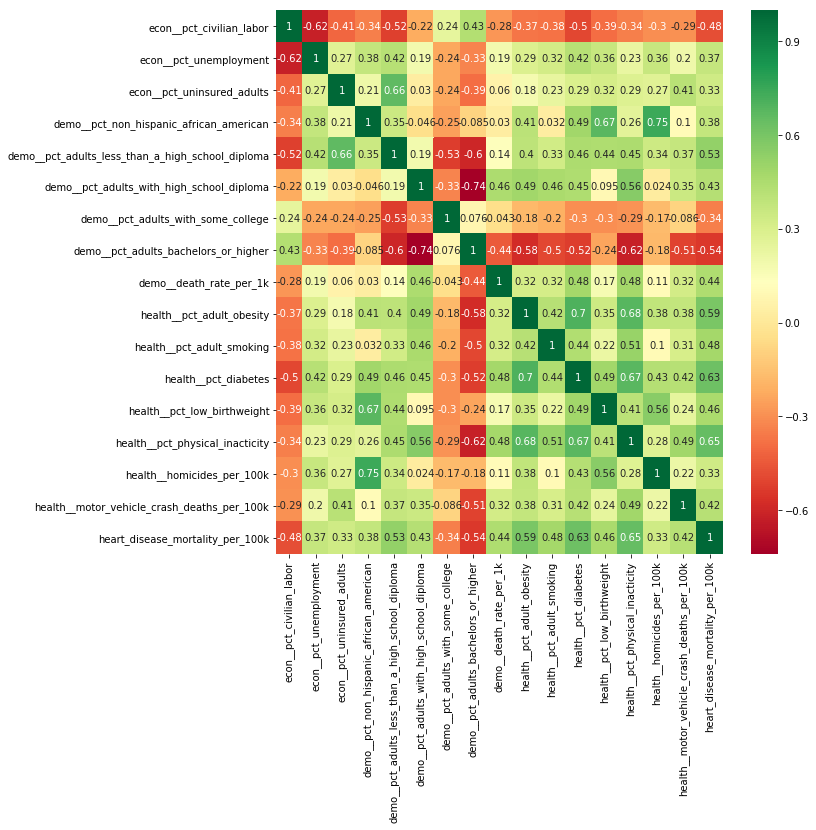

In [52]:
corrmat = df.corr()
top_corr_features = corrmat.index[abs(corrmat["heart_disease_mortality_per_100k"]) > 0.3]
plt.figure(figsize=(10, 10))
g = sns.heatmap(df[top_corr_features].corr(), annot=True, cmap="RdYlGn")

In [72]:
features = ['econ__pct_civilian_labor','econ__pct_unemployment','econ__pct_uninsured_adults',
                'demo__pct_non_hispanic_african_american','demo__pct_adults_less_than_a_high_school_diploma',
                'demo__pct_adults_with_high_school_diploma','demo__pct_adults_with_some_college',
                'demo__pct_adults_bachelors_or_higher','demo__death_rate_per_1k','health__pct_adult_obesity',
                'health__pct_adult_smoking','health__pct_diabetes','health__pct_low_birthweight',
                'health__pct_physical_inacticity','health__homicides_per_100k','health__motor_vehicle_crash_deaths_per_100k']

Outliers

In [54]:
df.drop(df[(df['econ__pct_civilian_labor']>0.75)&(df['heart_disease_mortality_per_100k']<=400)].index,inplace=True)
df.drop(df[(df['econ__pct_civilian_labor']>0.8)&(df['heart_disease_mortality_per_100k']>400)].index,inplace=True)

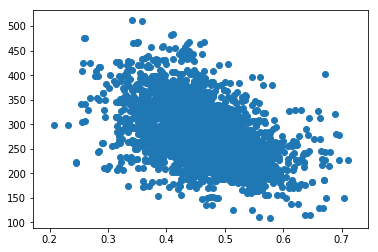

In [55]:
plt.scatter(df['econ__pct_civilian_labor'],df['heart_disease_mortality_per_100k'])

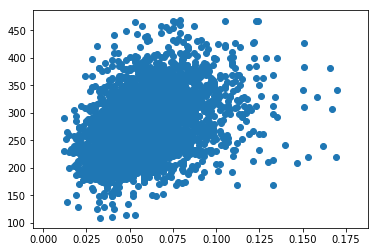

In [77]:
plt.scatter(df['econ__pct_unemployment'],df['heart_disease_mortality_per_100k'])
df.drop(df[(df['econ__pct_unemployment']>0.175)&(df['heart_disease_mortality_per_100k']>100)].index,inplace=True)

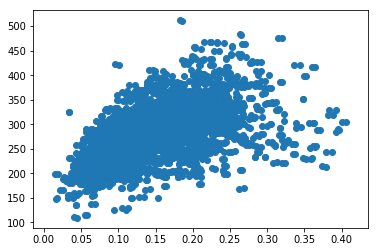

In [57]:
df.drop(df[(df['demo__pct_adults_less_than_a_high_school_diploma']>0.4)&(df['heart_disease_mortality_per_100k']<300)].index,inplace=True)
plt.scatter(df['demo__pct_adults_less_than_a_high_school_diploma'],df['heart_disease_mortality_per_100k'])

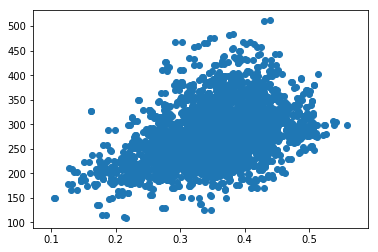

In [58]:
df.drop(df[(df['demo__pct_adults_with_high_school_diploma']<0.1)&(df['heart_disease_mortality_per_100k']<200)].index,inplace=True)
plt.scatter(df['demo__pct_adults_with_high_school_diploma'],df['heart_disease_mortality_per_100k'])

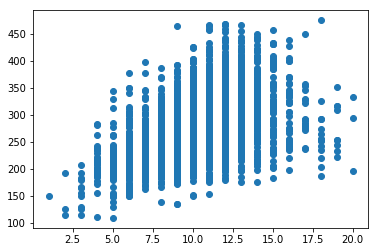

In [60]:
df.drop(df[(df['demo__death_rate_per_1k']<5)&(df['heart_disease_mortality_per_100k']>300)].index,inplace=True)
df.drop(df[(df['demo__death_rate_per_1k']>5)&(df['heart_disease_mortality_per_100k']>475)].index,inplace=True)
df.drop(df[(df['demo__death_rate_per_1k']>20)&(df['heart_disease_mortality_per_100k']<=300)].index,inplace=True)
df.drop(df[(df['demo__death_rate_per_1k']>22)&(df['heart_disease_mortality_per_100k']>300)].index,inplace=True)
plt.scatter(df['demo__death_rate_per_1k'],df['heart_disease_mortality_per_100k'])

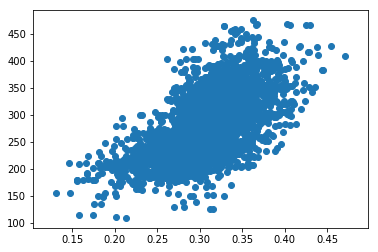

In [63]:
df.drop(df[(df['health__pct_adult_obesity']>0.425)&(df['heart_disease_mortality_per_100k']<250)].index,inplace=True)
plt.scatter(df['health__pct_adult_obesity'],df['heart_disease_mortality_per_100k'])

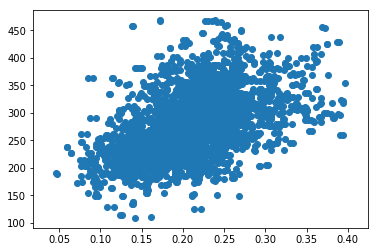

In [67]:
df.drop(df[(df['health__pct_adult_smoking']>0.4)&(df['heart_disease_mortality_per_100k']<350)].index,inplace=True)
df.drop(df[(df['health__pct_adult_smoking']>0.4)&(df['heart_disease_mortality_per_100k']>200)].index,inplace=True)
plt.scatter(df['health__pct_adult_smoking'],df['heart_disease_mortality_per_100k'])

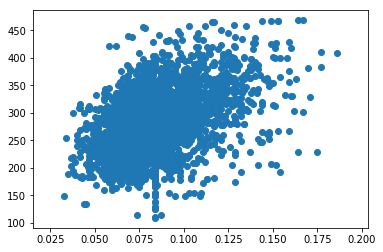

In [70]:
df.drop(df[(df['health__pct_low_birthweight']>0.20)&(df['heart_disease_mortality_per_100k']<200)].index,inplace=True)
plt.scatter(df['health__pct_low_birthweight'],df['heart_disease_mortality_per_100k'])

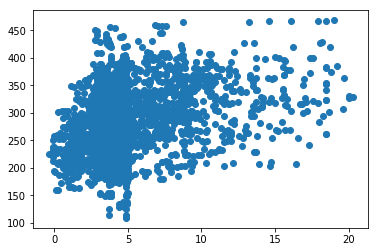

In [76]:
df.drop(df[(df['health__homicides_per_100k']>28)&(df['heart_disease_mortality_per_100k']>200)].index,inplace=True)
df.drop(df[(df['health__homicides_per_100k']>21)&(df['heart_disease_mortality_per_100k']>250)].index,inplace=True)
plt.scatter(df['health__homicides_per_100k'],df['heart_disease_mortality_per_100k'])

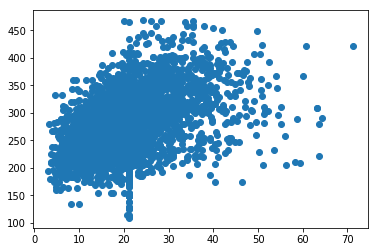

In [81]:
df.drop(df[(df['health__motor_vehicle_crash_deaths_per_100k']>65)&(df['heart_disease_mortality_per_100k']<350)].index,inplace=True)
plt.scatter(df['health__motor_vehicle_crash_deaths_per_100k'],df['heart_disease_mortality_per_100k'])

In [82]:
def scaler(x_train,x_test):
    sc = RobustScaler()
    x_train = pd.DataFrame(sc.fit_transform(x_train))
    x_test = pd.DataFrame(sc.transform(x_test))
    return x_train,x_test

In [111]:
#x = df[features]
x = df.drop('heart_disease_mortality_per_100k',axis=1)
y = df['heart_disease_mortality_per_100k']

In [112]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3)
x_train,x_test = scaler(x_train,x_test)

In [119]:
model = RandomForestRegressor(n_estimators=500,criterion='mse')
model.fit(x_train,y_train)

RandomForestRegressor(n_estimators=500)

In [120]:
model.score(x_test,y_test)

0.7299023746646572

In [126]:
y_pred = model.predict(x_test)
mean_squared_error(y_test,y_pred)**0.5

31.510006125242946